# Подготовка данных

In [918]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('kickstarter.csv')

In [919]:
df_2 = df.copy(deep=True)

In [920]:
df_2 = pd.read_csv('kickstarter.csv')
df_2 = pd.read_csv('kickstarter.csv')

df_2 = df_2[df_2['goal'] > 5]
df_2 = df_2[df_2['period'] < 80]
# Using 3 sigmas rule
n_sigmas = 3

std = df_2['created'].std()
mean = df_2['created'].mean()
df_2 = df_2[(df_2['created'] >= mean - std * n_sigmas) & (df_2['created'] <= mean + std * n_sigmas)]
print(mean - std * n_sigmas, mean + std * n_sigmas) # до 3

std = df_2['n_pled_t'].std()
mean = df_2['n_pled_t'].mean()
print(mean - std * n_sigmas, mean + std * n_sigmas) # до 28
df_2 = df_2[(df_2['n_pled_t'] >= mean - std * n_sigmas) & (df_2['n_pled_t'] <= mean + std * n_sigmas)]

-2.3196048878104314 2.8604102408992116
-7.7375942406523315 27.854264975336246


# SMA для количества картинок 

In [921]:
img_max = df_2['n_img'].max()
# print(img_max)
# максимальное количество картинок в проектах

In [922]:
#len_range = 3
# длина диапозона n_img
#if x_max_for_analysis % len_range != 0:
  #num_of_ranges = x_max_for_analysis // len_range + 1
#else:
  #num_of_ranges = x_max_for_analysis // len_range
# задаём количество диапозонов исследуемой переменной, полезно для оценки насколько подробным будет график
# print(num_of_ranges) что-то лишнее записалось, на 1 больше диапазон по факту получилось,
# потому num_of_ranges неверно показывает количество диапазонов

In [923]:
#for i in range(len(df_2["n_img"])):
  #k = df_2["n_img"].iloc[i] // len_range
  # номер диапазона в который попадёт проект
  #num_games_in_range[k] = num_games_in_range[k] + 1
#print(num_games_in_range)
# тут возможно из-за i которое было раньше доведено до определённого большого значения поломалось и out of range получилось

In [924]:
#our_n_img = []
#for m in range(0, len(df_2["n_img"])):
  #our_n_img.append(df_2['n_img'].iloc[m])
#our_n_img = sorted(our_n_img)
#df_3 = df_2.assign(sort_n_img=our_n_img)
# казалось нужно будет отсортировать столбец n_img, в итоге df_3 зря использовано было

In [925]:
def get_range(n, start, stop, step): # функция получения номера диапазона для конкретного значения n, где длина диапазона - step
# start и stop - начало и конец всего отрезка значений
    t = 0 # задаём номер первого диапазона
    for i in range(start, stop, step): # i - первое возможное значение в определённом диапазоне, например, i будет равно 0, 5, 10 etc для step = 5
        if n < i + step: # проверка на то, входит ли значение n в определённый диапазон или нет
          return t # выход из функции с возвращением искомого номера диапазона, если n входит в этот диапазон
        t += 1 # если в диапазон с номером t не входит значение n, смотрим следующий за t диапазон (то есть t+1)
    return t # если что-то не влезло во время цикла - оно будет закинуто в последний (так как t после цикла максимальное) диапазон

ranges = [] # список содержит номер диапазона каждого из проектов, длина списка - количество проектов

for idx, row in df_2.iterrows(): # iterrows() возвращает индекс (idx) и значение строки (rows) датафрейма, т.о. перебираем построчно датафрейм
  ranges.append(get_range(row[8], 0, img_max, len_range)) # добавляем в список номер диапазона для каждой строки т.е. каждого проекта
  # row[8] - значение столбца с индексом 8 т.е. n_img конкретной строки
ranges = pd.Series(ranges, dtype=int) # преобразование типа ranges из списка в Series чтобы добавить Series в датафрейм как столбец
df_4 = df_2.assign(image_range=ranges.values) # значения Series с помощью .values получаем и заносим в новый столбец image_range
df_4

,Unnamed: 0,URL,pled,goal,date,period,status,text_am,n_img,n_vid,n_pled_t,min_pled_t,max_pled_t,mean_pled_t,step_pled_t,cr_time,backed,created,site,rpg,platformer,shooter,fighting,survival,horror,strategy,arcade,simulator,mmo,indie,action,quest,adventure,mgp,cont,curr,succsess,is_site,image_range
0,8438,https://www.kickstarter.com/projects/577038691...,16.37,16368.00,2013-12-01,14,ended,355,7,0,8,1.64,8184.00,1206.321250,1168.908571,16,0,0,NaN,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0.653856,0.276952,GBP,0,0,2
1,3182,https://www.kickstarter.com/projects/200047954...,124761.28,7278.02,2015-08-03,30,ended,2218,33,3,5,3.64,99.71,43.960000,24.017500,592,3,1,blackwake.com,0,0,1,0,0,0,1,0,0,0,0,1,0,0,6.105621,0.220415,AUD,1,1,11
2,7977,https://www.kickstarter.com/projects/85660245/...,1211.00,35000.00,2013-04-12,31,ended,3174,19,3,13,5.00,1000.00,312.692308,82.916667,253,2,0,swiftcreekgames.com,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.556285,0.289384,USD,0,1,6
3,1270,https://www.kickstarter.com/projects/193393221...,1.00,10000.00,2013-11-13,14,ended,110,0,0,3,25.00,1000.00,425.000000,487.500000,195,0,0,hobbisoft.com,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,USD,0,1,0
4,6312,https://www.kickstarter.com/projects/148102341...,5415.00,67000.00,2016-04-25,30,ended,3955,46,1,15,1.00,1000.00,165.866667,71.357143,20,3,0,stellartactics.com,1,0,0,1,0,0,1,0,0,0,0,1,0,1,5.987628,0.256332,USD,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8416,8202,https://www.kickstarter.com/projects/501263634...,2246.00,7000.00,2014-03-11,60,ended,912,10,0,8,10.00,1000.00,366.875000,141.428571,191,0,1,regalcomputerservices.com,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3.246320,0.220351,USD,0,1,3
8417,3125,https://www.kickstarter.com/projects/154070452...,18021.00,15000.00,2015-09-22,45,ended,1650,39,2,23,1.00,8000.00,733.434783,363.590909,146,21,1,ddt-games.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.707396,0.230234,USD,1,1,13
8418,322,https://www.kickstarter.com/projects/101642300...,14.00,10000.00,2016-02-17,30,ended,280,10,1,9,1.00,200.00,67.888889,24.875000,703,0,1,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.763008,0.328798,USD,0,0,3
8419,1098,https://www.kickstarter.com/projects/173840524...,82.88,3928.54,2014-05-31,31,ended,777,0,0,7,4.60,92.09,40.124286,14.581667,93,1,0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.000000,0.000000,CAD,0,0,0


In [926]:
success_rate = df_4['pled'] / df_4['goal'] 
df_4['success_rate'] = success_rate # добавляем столбец success_rate так как на графике по оси ординат будет среднее арифметическое success_rate

In [927]:
num_games_in_range = [0] * (df_4["image_range"].max() + 1)
# массив с количеством проектов в этом диапазоне
sum_range = [0] * (df_4["image_range"].max() + 1)
# сумма success_rate проектов в этом диапазоне
sma_range = [0] * (df_4["image_range"].max() + 1)
# среднее арифметическое (SMA) в этом диапазоне

In [928]:
for f in range(0, len(df_4["n_img"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['image_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  num_games_in_range[this_range] += 1 # добавляем 1 к количеству проектов в определённом диапазоне
print(num_games_in_range)

[2553, 857, 706, 550, 490, 418, 345, 304, 299, 251, 225, 178, 163, 147, 122, 89, 89, 56, 59, 49, 30, 32, 21, 18, 12, 10, 5, 5, 3, 2, 0, 4, 3, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [929]:
for f in range(0, len(df_4["n_img"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['image_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  sum_range[this_range] += df_4['success_rate'].iloc[f] # суммируем success_rate всего диапазона с success_rate конкретного проекта
print(sum_range)

[577.0562933207838, 588.8259750871175, 458.89824043959817, 332.7887096809304, 500.98539021329566, 449.80180671167943, 831.1517865472363, 269.6886503690789, 649.6525398388128, 216.65038291442323, 171.21119017072917, 138.2563953904591, 163.32293871262897, 148.67983161022593, 107.7830364585812, 81.37399092116242, 101.52238875027548, 39.072258839852836, 58.48860829375264, 45.986024274594065, 24.132475868432838, 34.8382288326646, 16.345073206698327, 18.87334299685344, 8.557465944089218, 12.471675732286709, 33.67911492010659, 2.784272091594027, 11.6424, 2.2016233333333335, 0, 5.330908060264811, 5.509780874864763, 1.2097875, 0, 2.0469666375282047, 2.939454530445822, 1.6759692307692309, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03425]


In [930]:
for f in range(0, df_4["image_range"].max() + 1):
  if num_games_in_range[f] == 0: # на 0 не делим
    sma_range[f] = 0
  else:
    sma_range[f] = sum_range[f] / num_games_in_range[f]
# вычисляем среднее арифметическое success_rate по диапазону - это SMA (простая скользящая средняя)
print(sma_range)

[0.22603066718401243, 0.6870781506267416, 0.6499975077048132, 0.6050703812380553, 1.0224191637006035, 1.0760808773006685, 2.409135613180395, 0.8871337183193385, 2.1727509693605778, 0.8631489359140367, 0.7609386229810186, 0.7767213224183095, 1.0019812190958832, 1.0114274259199043, 0.8834675119555836, 0.914314504732162, 1.1407009971941064, 0.697718907854515, 0.9913323439619092, 0.9384902913182462, 0.8044158622810946, 1.0886946510207687, 0.778336819366587, 1.0485190553807469, 0.7131221620074348, 1.247167573228671, 6.735822984021318, 0.5568544183188054, 3.8808000000000002, 1.1008116666666667, 0, 1.3327270150662027, 1.836593624954921, 1.2097875, 0, 1.0234833187641024, 1.469727265222911, 1.6759692307692309, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03425]


In [931]:
in_x = [] # ось х заполняем значениями границ диапазонов
k = 0
while k <= img_max:
  in_x.append(k)
  k += len_range

In [932]:
in_y = sma_range # задаём ось у значениями среднего арифметического в этом диапазоне

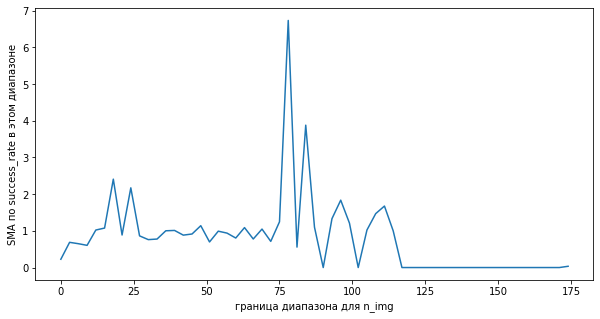

In [933]:
plt.figure(figsize=(10, 5)) # устанавливаем размер графика - 5 * 10 дюймов
plt.xlabel("граница диапазона для n_img")
# подписываем ось Х
plt.ylabel("SMA по success_rate в этом диапазоне")
# подписываем ось У
plt.plot(in_x, in_y) # строим график с скользящей средней n_img
plt.show()

# SMA для количества слов

In [934]:
text_max = df_2['text_am'].max()
# максимальное количество слов в проектах
# print(text_max)

In [935]:
len_range_2 = 100
# длина диапозона text_am

In [936]:
ranges_2 = [] # список содержит номер диапазона каждого из проектов, длина списка - количество проектов

for idx, row in df_2.iterrows(): # iterrows() возвращает индекс (idx) и значение строки (rows) датафрейма, т.о. перебираем построчно датафрейм
  ranges_2.append(get_range(row[7], 0, text_max, len_range_2)) # добавляем в список номер диапазона для каждой строки т.е. каждого проекта
  # row[7] - значение столбца с индексом 7 т.е. text_am конкретной строки
ranges_2 = pd.Series(ranges_2, dtype=int) # преобразование типа ranges_2 из списка в Series чтобы добавить Series в датафрейм как столбец
df_4 = df_4.assign(text_range=ranges_2.values) # значения Series с помощью .values получаем и заносим в новый столбец text_range
# df_4["text_range"].max() проверка что количество диапазонов адекватное число

In [937]:
num_games_in_range_2 = [0] * (df_4["text_range"].max() + 1)
# массив с количеством проектов в этом диапазоне
sum_range_2 = [0] * (df_4["text_range"].max() + 1)
# сумма success_rate проектов в этом диапазоне
sma_range_2 = [0] * (df_4["text_range"].max() + 1)
# среднее арифметическое (SMA) в этом диапазоне

In [938]:
for f in range(0, len(df_4["text_am"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['text_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  num_games_in_range_2[this_range] += 1 # добавляем 1 к количеству проектов в определённом диапазоне
print(num_games_in_range_2)

[191, 536, 599, 597, 519, 449, 447, 427, 378, 357, 329, 305, 277, 259, 236, 226, 213, 171, 176, 150, 151, 114, 96, 97, 102, 89, 60, 62, 67, 46, 53, 31, 25, 29, 25, 25, 26, 28, 17, 16, 22, 11, 13, 11, 12, 9, 6, 6, 2, 1, 3, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1]


In [939]:
for f in range(0, len(df_4["text_am"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['text_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  sum_range_2[this_range] += df_4['success_rate'].iloc[f] # суммируем success_rate всего диапазона с success_rate конкретного проекта
print(sum_range_2)

[16.666452861883712, 77.06491007397383, 146.55671124214493, 155.0076132774202, 253.7897205923004, 284.420053328651, 246.44912281752843, 814.2907193569444, 390.35663772758625, 626.2149998768267, 253.63868866978135, 238.31805935825642, 243.73514823921133, 152.26210278958752, 206.89117795991788, 249.21214104122882, 160.22232885997425, 123.69017076184959, 136.1647339551177, 126.52556336392674, 122.44037927142809, 128.80368565726891, 86.21926455988275, 73.75187666531333, 70.9452343752244, 66.35752897205307, 69.33384209968449, 38.2138392266857, 89.706771135362, 41.559298063971625, 48.31619606129438, 45.61256201651271, 11.83818331565529, 48.219730620186155, 23.099661942321145, 17.72096553644857, 26.243348456458584, 47.11350622361924, 26.489786125999608, 10.937696983419054, 15.740234680546706, 9.756757349037823, 39.68533248675912, 17.078971335016274, 20.96665279483289, 7.1756346380890905, 5.677474609584571, 5.447543736983217, 0.24124788047118184, 0.06659272574261321, 0.03955, 0, 0.122499753400

In [940]:
for f in range(0, df_4["text_range"].max() + 1):
  if num_games_in_range_2[f] == 0: # на 0 не делим
    sma_range_2[f] = 0
  else:
    sma_range_2[f] = sum_range_2[f] / num_games_in_range_2[f]
# вычисляем среднее арифметическое success_rate по диапазону - это SMA (простая скользящая средняя)
print(sma_range_2)

[0.08725891550724457, 0.14377781730219, 0.244668967015267, 0.25964424334576247, 0.4889975348599237, 0.6334522345849689, 0.5513403195023008, 1.9070040265970594, 1.0326895177978472, 1.7541036411115594, 0.7709382634339859, 0.7813706864205129, 0.8799102824520264, 0.5878845667551642, 0.8766575337284656, 1.1027085886780037, 0.7522175063848556, 0.7233343319406409, 0.7736632611086233, 0.8435037557595115, 0.8108634388836297, 1.129856891730429, 0.8981173391654452, 0.7603286254156014, 0.6955415134825922, 0.7455902131691357, 1.1555640349947416, 0.6163522455917049, 1.3389070318710747, 0.9034630013906875, 0.9116263407791392, 1.4713729682746035, 0.47352733262621155, 1.662749331730557, 0.9239864776928458, 0.7088386214579429, 1.0093595560176378, 1.6826252222721156, 1.5582227132940947, 0.6836060614636909, 0.715465212752123, 0.8869779408216203, 3.0527178835968556, 1.5526337577287521, 1.747221066236074, 0.7972927375654545, 0.9462457682640952, 0.9079239561638696, 0.12062394023559092, 0.06659272574261321, 0

In [941]:
in_x_2 = [] # ось х заполняем значениями границ диапазонов
k = 0
while k <= text_max:
  in_x_2.append(k)
  k += len_range_2

In [942]:
in_y_2 = sma_range_2 # задаём ось у значениями среднего арифметического в этом диапазоне

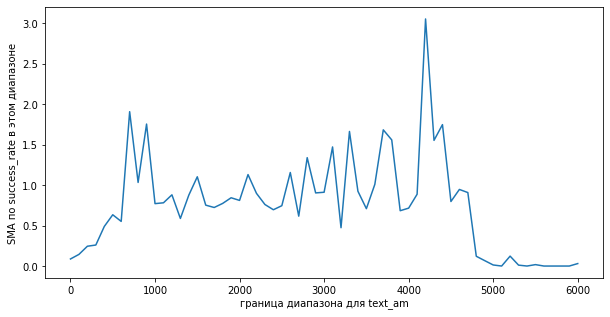

In [943]:
plt.figure(figsize=(10, 5)) # устанавливаем размер графика - 5 * 10 дюймов
plt.xlabel("граница диапазона для text_am")
# подписываем ось Х
plt.ylabel("SMA по success_rate в этом диапазоне")
# подписываем ось У
plt.plot(in_x_2, in_y_2) # строим график с скользящей средней text_am
plt.show()

#SMA для created

In [944]:
created_max = df_2['created'].max()
# максимальное количество созданных проектов авторами

In [945]:
len_range_3 = 1
# длина диапозона created

In [946]:
ranges_3 = [] # список содержит номер диапазона каждого из проектов, длина списка - количество проектов

for idx, row in df_4.iterrows(): # iterrows() возвращает индекс (idx) и значение строки (rows) датафрейма, т.о. перебираем построчно датафрейм
  ranges_3.append(get_range(row[17], 0, created_max, len_range_3)) # добавляем в список номер диапазона для каждой строки т.е. каждого проекта
  # row[17] - значение столбца с индексом 17 т.е. created конкретной строки
ranges_3 = pd.Series(ranges_3, dtype=int) # преобразование типа ranges_2 из списка в Series чтобы добавить Series в датафрейм как столбец
df_4 = df_4.assign(created_range=ranges_3.values) # значения Series с помощью .values получаем и заносим в новый столбец created_range

In [947]:
num_games_in_range_3 = [0] * (df_4["created_range"].max() + 1)
# массив с количеством проектов в этом диапазоне
sum_range_3 = [0] * (df_4["created_range"].max() + 1)
# сумма success_rate проектов в этом диапазоне
sma_range_3 = [0] * (df_4["created_range"].max() + 1)
# среднее арифметическое (SMA) в этом диапазоне

In [948]:
for f in range(0, len(df_4["created"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['created_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  num_games_in_range_3[this_range] += 1 # добавляем 1 к количеству проектов в определённом диапазоне

In [949]:
for f in range(0, len(df_4["created"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['created_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  sum_range_3[this_range] += df_4['success_rate'].iloc[f] # суммируем success_rate всего диапазона с success_rate конкретного проекта
print(sum_range_3)

[4686.6792933934275, 1164.988678398983, 264.8012565127598]


In [950]:
for f in range(0, df_4["created_range"].max() + 1):
  if num_games_in_range_3[f] == 0: # на 0 не делим
    sma_range_3[f] = 0
  else:
    sma_range_3[f] = sum_range_3[f] / num_games_in_range_3[f]
# вычисляем среднее арифметическое success_rate по диапазону - это SMA (простая скользящая средняя)
print(sma_range_3)

[0.6780496662895584, 1.1985480230442211, 1.2091381575925104]


In [951]:
in_x_3 = [] # ось х заполняем значениями границ диапазонов
k = 0
while k <= created_max:
  in_x_3.append(k)
  k += len_range_3

In [952]:
in_y_3 = sma_range_3 # задаём ось у значениями среднего арифметического в этом диапазоне

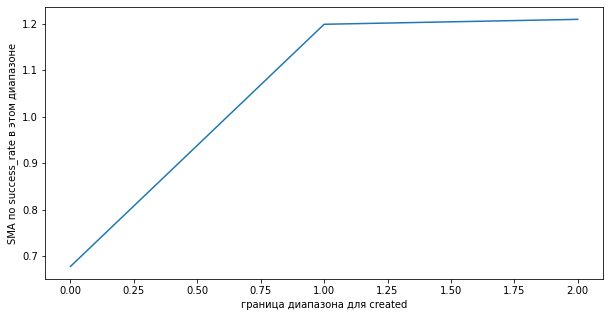

In [953]:
plt.figure(figsize=(10, 5)) # устанавливаем размер графика - 5 * 10 дюймов
plt.xlabel("граница диапазона для created")
# подписываем ось Х
plt.ylabel("SMA по success_rate в этом диапазоне")
# подписываем ось У
plt.plot(in_x_3, in_y_3) # строим график с скользящей средней text_am
plt.show()

# SMA для n_vid

In [954]:
vid_max = df_2['n_vid'].max()

In [955]:
len_range_4 = 1
# длина диапозона n_vid

In [956]:
ranges_4 = [] # список содержит номер диапазона каждого из проектов, длина списка - количество проектов

for idx, row in df_4.iterrows(): # iterrows() возвращает индекс (idx) и значение строки (rows) датафрейма, т.о. перебираем построчно датафрейм
  ranges_4.append(get_range(row[9], 0, vid_max, len_range_4)) # добавляем в список номер диапазона для каждой строки т.е. каждого проекта
  # row[9] - значение столбца с индексом 9 т.е. n_vid конкретной строки
ranges_4 = pd.Series(ranges_4, dtype=int) # преобразование типа из списка в Series чтобы добавить Series в датафрейм как столбец
df_4 = df_4.assign(vid_range=ranges_4.values) # значения Series с помощью .values получаем и заносим в новый столбец vid_range

In [957]:
num_games_in_range_4 = [0] * (df_4["vid_range"].max() + 1)
# массив с количеством проектов в этом диапазоне
sum_range_4 = [0] * (df_4["vid_range"].max() + 1)
# сумма success_rate проектов в этом диапазоне
sma_range_4 = [0] * (df_4["vid_range"].max() + 1)
# среднее арифметическое (SMA) в этом диапазоне

In [958]:
for f in range(0, len(df_4["n_vid"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['vid_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  num_games_in_range_4[this_range] += 1 # добавляем 1 к количеству проектов в определённом диапазоне

In [959]:
for f in range(0, len(df_4["n_vid"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['vid_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  sum_range_4[this_range] += df_4['success_rate'].iloc[f] # суммируем success_rate всего диапазона с success_rate конкретного проекта
print(sum_range_4)

[709.5103272951426, 3681.408104508723, 743.1129501573572, 604.7920546631094, 158.24261235933582, 80.71467150960109, 57.742956600894196, 57.91605299721208, 8.433871669507774, 6.677877425218029, 0.4307741666666667, 0, 0, 4.839460952380953, 0.17695, 2.469444, 0.00112]


In [960]:
for f in range(0, df_4["vid_range"].max() + 1):
  if num_games_in_range_4[f] == 0: # на 0 не делим
    sma_range_4[f] = 0
  else:
    sma_range_4[f] = sum_range_4[f] / num_games_in_range_4[f]
# вычисляем среднее арифметическое success_rate по диапазону - это SMA (простая скользящая средняя)
print(sma_range_4)

[0.14382937913949778, 1.971830800486729, 1.145012249857253, 1.8782361946059298, 1.0692068402657826, 1.0089333938700136, 1.3123399227475954, 2.1450389998967436, 0.4961100982063396, 1.1129795708696715, 0.21538708333333334, 0, 0, 1.2098652380952382, 0.17695, 1.234722, 0.00112]


In [961]:
in_x_4 = [] # ось х заполняем значениями границ диапазонов
k = 0
while k <= vid_max:
  in_x_4.append(k)
  k += len_range_4

In [962]:
in_y_4 = sma_range_4 # задаём ось у значениями среднего арифметического в этом диапазоне

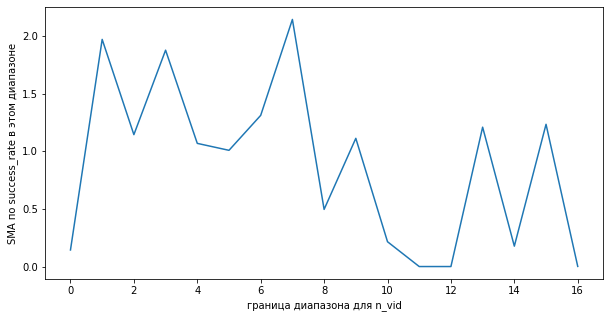

In [963]:
plt.figure(figsize=(10, 5)) # устанавливаем размер графика - 5 * 10 дюймов
plt.xlabel("граница диапазона для n_vid")
# подписываем ось Х
plt.ylabel("SMA по success_rate в этом диапазоне")
# подписываем ось У
plt.plot(in_x_4, in_y_4) # строим график с скользящей средней text_am
plt.show()

# SMA для cont

In [964]:
def get_range_float(x, start, step):
  return int((x - start) / step)

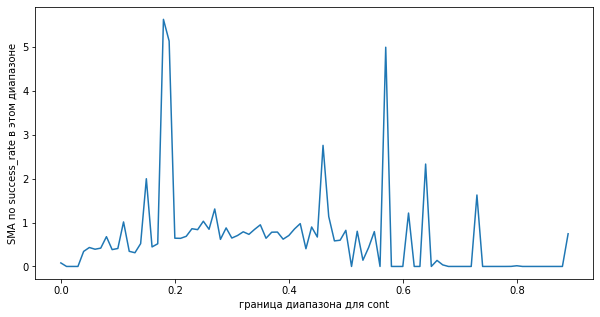

In [965]:
cont_max = df_2["cont"].max()

len_range_5 = 0.01

ranges_5 = [] # список содержит номер диапазона каждого из проектов, длина списка - количество проектов

for idx, row in df_4.iterrows(): # iterrows() возвращает индекс (idx) и значение строки (rows) датафрейма, т.о. перебираем построчно датафрейм
  ranges_5.append(get_range_float(row[34], 0, len_range_5)) # добавляем в список номер диапазона для каждой строки т.е. каждого проекта
  # row[34] - значение столбца с индексом 34 т.е. cont конкретной строки
ranges_5 = pd.Series(ranges_5, dtype=int) # преобразование типа из списка в Series чтобы добавить Series в датафрейм как столбец
df_4 = df_4.assign(cont_range=ranges_5.values) # значения Series с помощью .values получаем и заносим в новый столбец cont_range

num_games_in_range_5 = [0] * (df_4["cont_range"].max() + 1)
# массив с количеством проектов в этом диапазоне
sum_range_5 = [0] * (df_4["cont_range"].max() + 1)
# сумма success_rate проектов в этом диапазоне
sma_range_5 = [0] * (df_4["cont_range"].max() + 1)
# среднее арифметическое (SMA) в этом диапазоне

for f in range(0, len(df_4["cont"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['cont_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  num_games_in_range_5[this_range] += 1 # добавляем 1 к количеству проектов в определённом диапазоне

for f in range(0, len(df_4["cont"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['cont_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  sum_range_5[this_range] += df_4['success_rate'].iloc[f] # суммируем success_rate всего диапазона с success_rate конкретного проекта
#print(sum_range_5)  

for f in range(0, df_4["cont_range"].max() + 1):
  if num_games_in_range_5[f] == 0: # на 0 не делим
    sma_range_5[f] = 0
  else:
    sma_range_5[f] = sum_range_5[f] / num_games_in_range_5[f]
# вычисляем среднее арифметическое success_rate по диапазону - это SMA (простая скользящая средняя)
#print(sma_range_5)

in_x_5 = [] # ось х заполняем значениями границ диапазонов
k = 0
while k <= cont_max:
  in_x_5.append(k)
  k += len_range_5

in_y_5 = sma_range_5 # задаём ось у значениями среднего арифметического в этом диапазоне  

plt.figure(figsize=(10, 5)) # устанавливаем размер графика - 5 * 10 дюймов
plt.xlabel("граница диапазона для cont")
# подписываем ось Х
plt.ylabel("SMA по success_rate в этом диапазоне")
# подписываем ось У
plt.plot(in_x_5, in_y_5) # строим график с скользящей средней text_am
plt.show()

# SMA для mgp

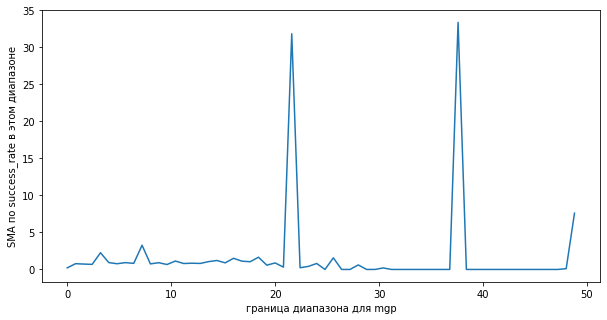

In [966]:
mgp_max = df_2["mgp"].max()

len_range_6 = 0.8

ranges_6 = [] # список содержит номер диапазона каждого из проектов, длина списка - количество проектов

for idx, row in df_4.iterrows(): # iterrows() возвращает индекс (idx) и значение строки (rows) датафрейма, т.о. перебираем построчно датафрейм
  ranges_6.append(get_range_float(row[33], 0, len_range_6)) # добавляем в список номер диапазона для каждой строки т.е. каждого проекта
  # row[33] - значение столбца с индексом 33 т.е. mgp конкретной строки
ranges_6 = pd.Series(ranges_6, dtype=int) # преобразование типа из списка в Series чтобы добавить Series в датафрейм как столбец
df_4 = df_4.assign(mgp_range=ranges_6.values) # значения Series с помощью .values получаем и заносим в новый столбец cont_range

num_games_in_range_6 = [0] * (df_4["mgp_range"].max() + 1)
# массив с количеством проектов в этом диапазоне
sum_range_6 = [0] * (df_4["mgp_range"].max() + 1)
# сумма success_rate проектов в этом диапазоне
sma_range_6 = [0] * (df_4["mgp_range"].max() + 1)
# среднее арифметическое (SMA) в этом диапазоне

for f in range(0, len(df_4["mgp"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['mgp_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  num_games_in_range_6[this_range] += 1 # добавляем 1 к количеству проектов в определённом диапазоне

for f in range(0, len(df_4["mgp"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['mgp_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  sum_range_6[this_range] += df_4['success_rate'].iloc[f] # суммируем success_rate всего диапазона с success_rate конкретного проекта
#print(sum_range_6)  

for f in range(0, df_4["mgp_range"].max() + 1):
  if num_games_in_range_6[f] == 0: # на 0 не делим
    sma_range_6[f] = 0
  else:
    sma_range_6[f] = sum_range_6[f] / num_games_in_range_6[f]
# вычисляем среднее арифметическое success_rate по диапазону - это SMA (простая скользящая средняя)
#print(sma_range_6)

in_x_6 = [] # ось х заполняем значениями границ диапазонов
k = 0
while k <= mgp_max:
  in_x_6.append(k)
  k += len_range_6

in_y_6 = sma_range_6 # задаём ось у значениями среднего арифметического в этом диапазоне  

plt.figure(figsize=(10, 5)) # устанавливаем размер графика - 5 * 10 дюймов
plt.xlabel("граница диапазона для mgp")
# подписываем ось Х
plt.ylabel("SMA по success_rate в этом диапазоне")
# подписываем ось У
plt.plot(in_x_6, in_y_6) # строим график с скользящей средней text_am
plt.show()

# SMA для n_pled_t

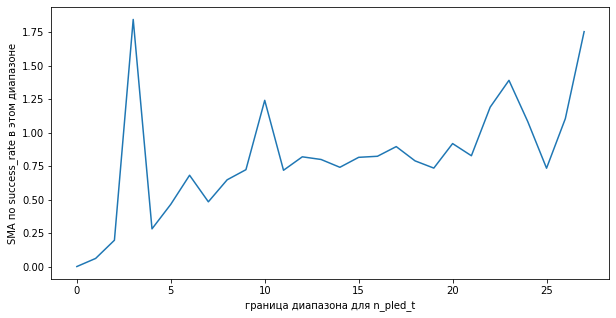

In [967]:
pled_max = df_2["n_pled_t"].max()

len_range_7 = 1

ranges_7 = [] # список содержит номер диапазона каждого из проектов, длина списка - количество проектов

for idx, row in df_4.iterrows(): # iterrows() возвращает индекс (idx) и значение строки (rows) датафрейма, т.о. перебираем построчно датафрейм
  ranges_7.append(get_range(row[10], 0, pled_max, len_range_7)) # добавляем в список номер диапазона для каждой строки т.е. каждого проекта
  # row[10] - значение столбца с индексом 10 т.е. n_pled_t конкретной строки
ranges_7 = pd.Series(ranges_7, dtype=int) # преобразование типа из списка в Series чтобы добавить Series в датафрейм как столбец
df_4 = df_4.assign(pled_range=ranges_7.values) # значения Series с помощью .values получаем и заносим в новый столбец cont_range

num_games_in_range_7 = [0] * (df_4["pled_range"].max() + 1)
# массив с количеством проектов в этом диапазоне
sum_range_7 = [0] * (df_4["pled_range"].max() + 1)
# сумма success_rate проектов в этом диапазоне
sma_range_7 = [0] * (df_4["pled_range"].max() + 1)
# среднее арифметическое (SMA) в этом диапазоне

for f in range(0, len(df_4["n_pled_t"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['pled_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  num_games_in_range_7[this_range] += 1 # добавляем 1 к количеству проектов в определённом диапазоне

for f in range(0, len(df_4["n_pled_t"])): # перебор по всем проектам в датафрейме, от 0 на случай если f было раньше где-то использовано
  this_range = df_4['pled_range'].iloc[f] # переменная хранит номер диапазона конкретного проекта
  sum_range_7[this_range] += df_4['success_rate'].iloc[f] # суммируем success_rate всего диапазона с success_rate конкретного проекта
#print(sum_range_7)  

for f in range(0, df_4["pled_range"].max() + 1):
  if num_games_in_range_7[f] == 0: # на 0 не делим
    sma_range_7[f] = 0
  else:
    sma_range_7[f] = sum_range_7[f] / num_games_in_range_7[f]
# вычисляем среднее арифметическое success_rate по диапазону - это SMA (простая скользящая средняя)
#print(sma_range_7)

in_x_7 = [] # ось х заполняем значениями границ диапазонов
k = 0
while k <= pled_max:
  in_x_7.append(k)
  k += len_range_7

in_y_7 = sma_range_7 # задаём ось у значениями среднего арифметического в этом диапазоне  

plt.figure(figsize=(10, 5)) # устанавливаем размер графика - 5 * 10 дюймов
plt.xlabel("граница диапазона для n_pled_t")
# подписываем ось Х
plt.ylabel("SMA по success_rate в этом диапазоне")
# подписываем ось У
plt.plot(in_x_7, in_y_7) # строим график с скользящей средней text_am
plt.show()